# Airbnb NYC EDA & Clustering
This notebook performs exploratory data analysis and clustering to identify less busy yet similar neighbourhoods in NYC using the AB_NYC_2019 dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

sns.set(style="whitegrid")


#### Import the dataset

In [10]:
df = pd.read_csv("data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Remove extreme price outliers

In [12]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['busyness_score'] = df['reviews_per_month'] * df['availability_365']

#### Aggregate Neighbourhood Statistics

In [13]:
agg_df = df.groupby(['neighbourhood_group', 'neighbourhood']).agg({
    'price': 'mean',
    'minimum_nights': 'mean',
    'availability_365': 'mean',
    'reviews_per_month': 'mean',
    'busyness_score': 'mean',
    'calculated_host_listings_count': 'mean'
}).reset_index()

#### Price and Busyness Score Distribution by Borough

In [15]:
features = ['price', 'minimum_nights', 'availability_365', 'reviews_per_month', 'busyness_score']
scaler = StandardScaler()
agg_df_scaled = agg_df.copy()
agg_df_scaled[features] = scaler.fit_transform(agg_df[features])

#### Clustering Neighbourhoods Using KMeans, Agglomerative, and DBSCAN

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
agg_df_scaled['kmeans_cluster'] = kmeans.fit_predict(agg_df_scaled[features])

agglo = AgglomerativeClustering(n_clusters=5)
agg_df_scaled['agglo_cluster'] = agglo.fit_predict(agg_df_scaled[features])

dbscan = DBSCAN(eps=1.5, min_samples=5)
agg_df_scaled['dbscan_cluster'] = dbscan.fit_predict(agg_df_scaled[features])

print(agg_df_scaled.columns)

#### Visualizing Clustering Results: Price vs. Busyness Score

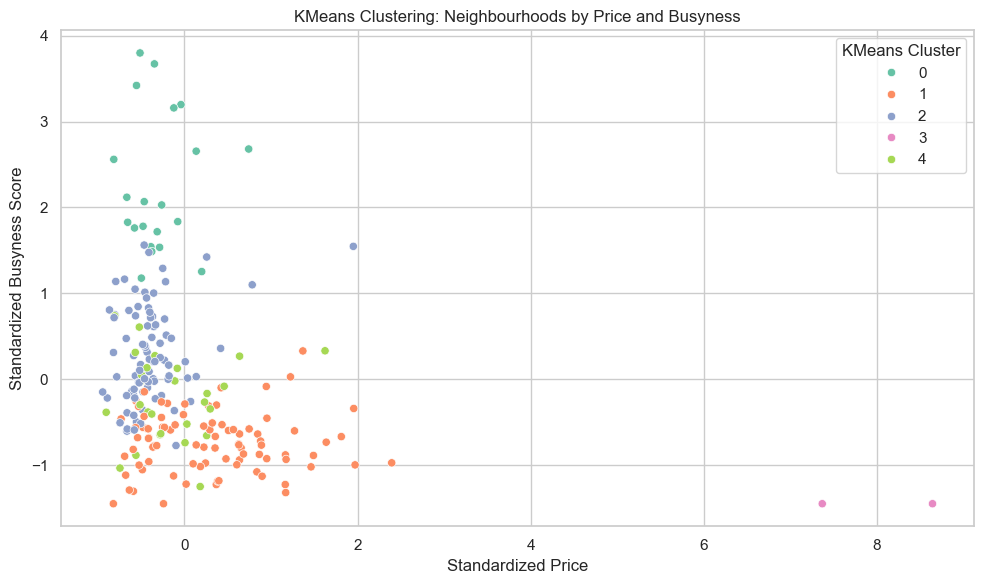

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_df_scaled, x='price', y='busyness_score', hue='kmeans_cluster', palette='Set2')
plt.title("KMeans Clustering: Neighbourhoods by Price and Busyness")
plt.xlabel("Standardized Price")
plt.ylabel("Standardized Busyness Score")
plt.legend(title='KMeans Cluster')
plt.tight_layout()
plt.show()

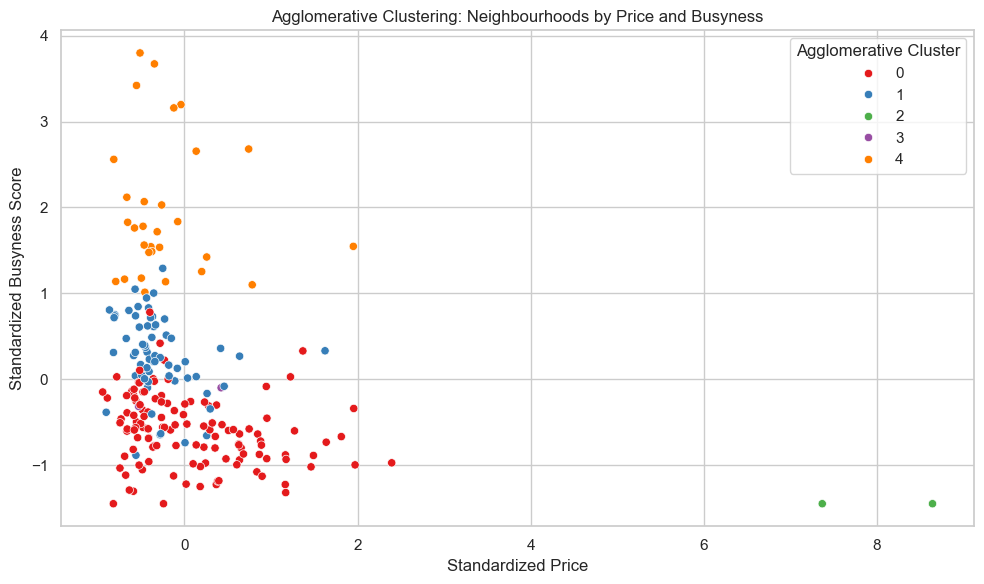

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_df_scaled, x='price', y='busyness_score', hue='agglo_cluster', palette='Set1')
plt.title("Agglomerative Clustering: Neighbourhoods by Price and Busyness")
plt.xlabel("Standardized Price")
plt.ylabel("Standardized Busyness Score")
plt.legend(title='Agglomerative Cluster')
plt.tight_layout()
plt.show()

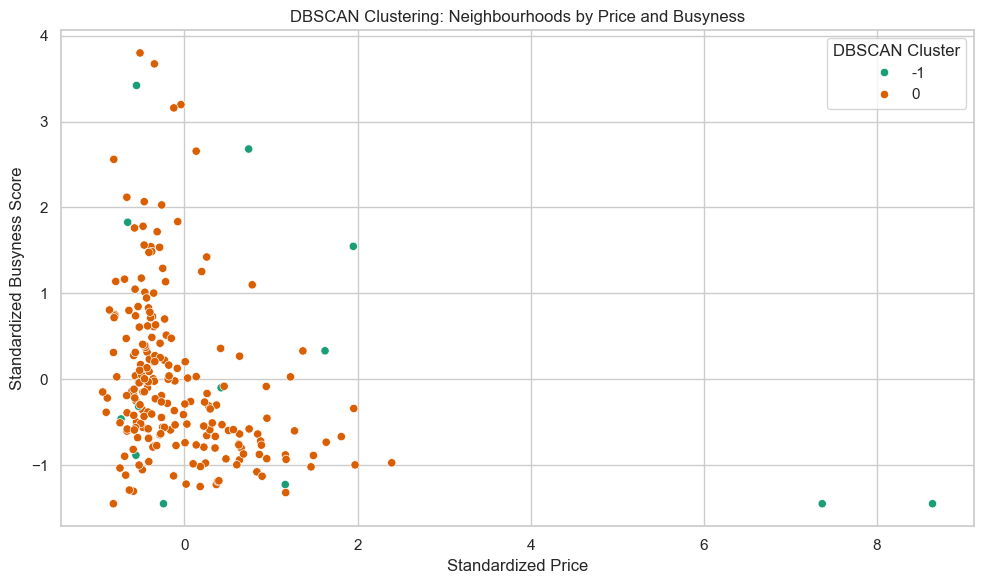

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_df_scaled, x='price', y='busyness_score', hue='dbscan_cluster', palette='Dark2')
plt.title("DBSCAN Clustering: Neighbourhoods by Price and Busyness")
plt.xlabel("Standardized Price")
plt.ylabel("Standardized Busyness Score")
plt.legend(title='DBSCAN Cluster')
plt.tight_layout()
plt.show()

#### Visualizing Feature Distributions with Histograms

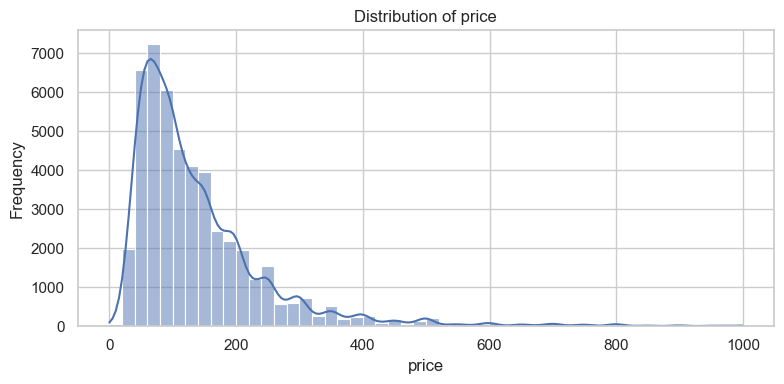

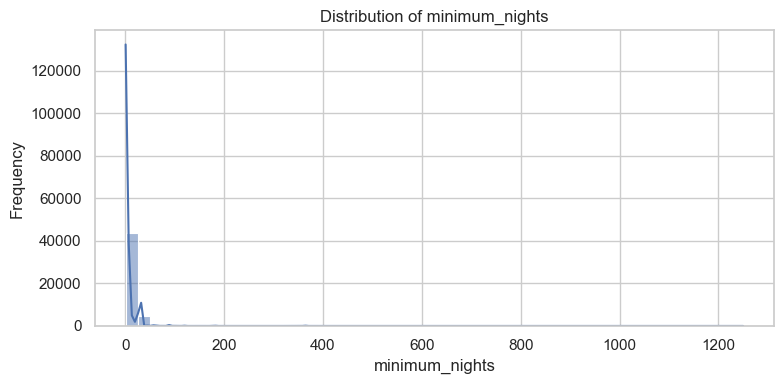

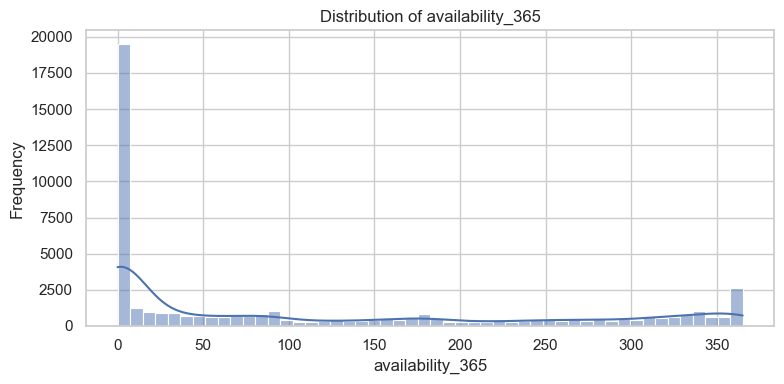

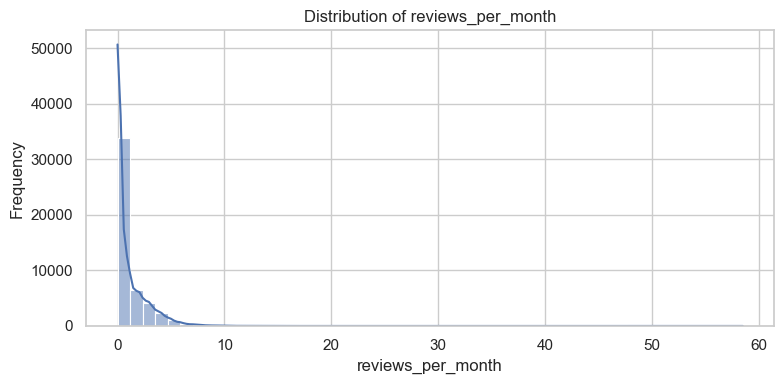

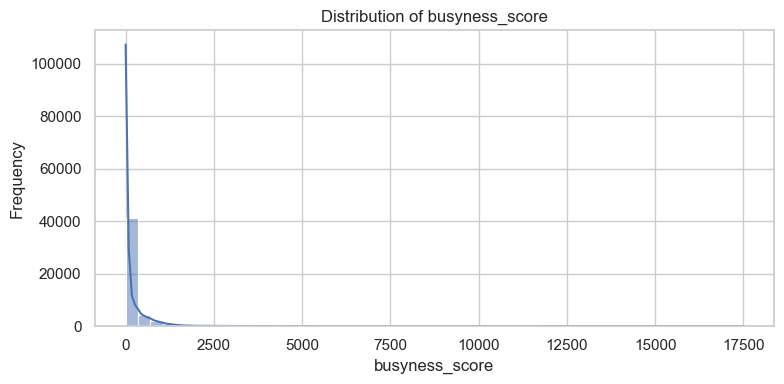

In [26]:
eda_features = ['price', 'minimum_nights', 'availability_365', 'reviews_per_month', 'busyness_score']
for col in eda_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

#### Comparing Price and Busyness Score Distributions Across Boroughs

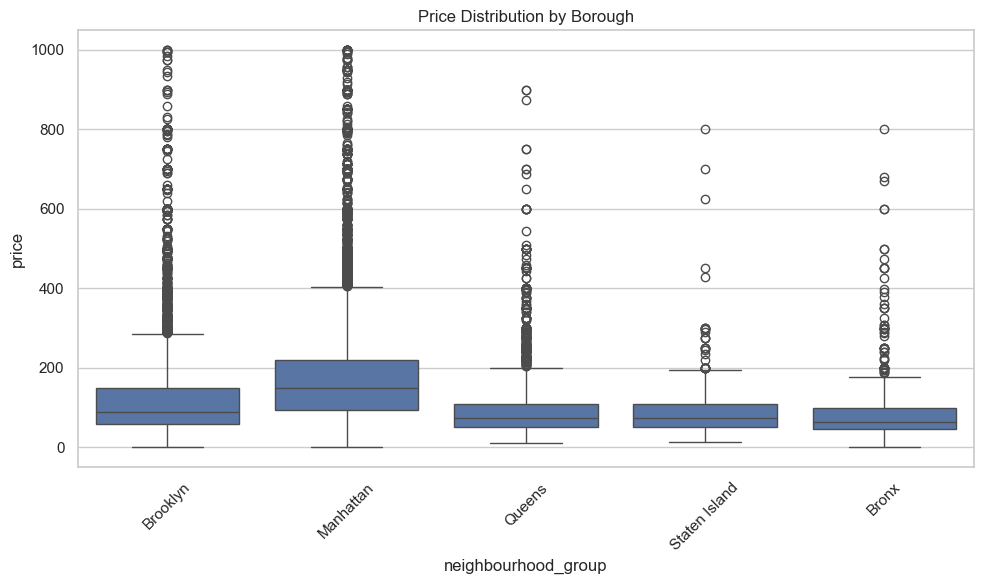

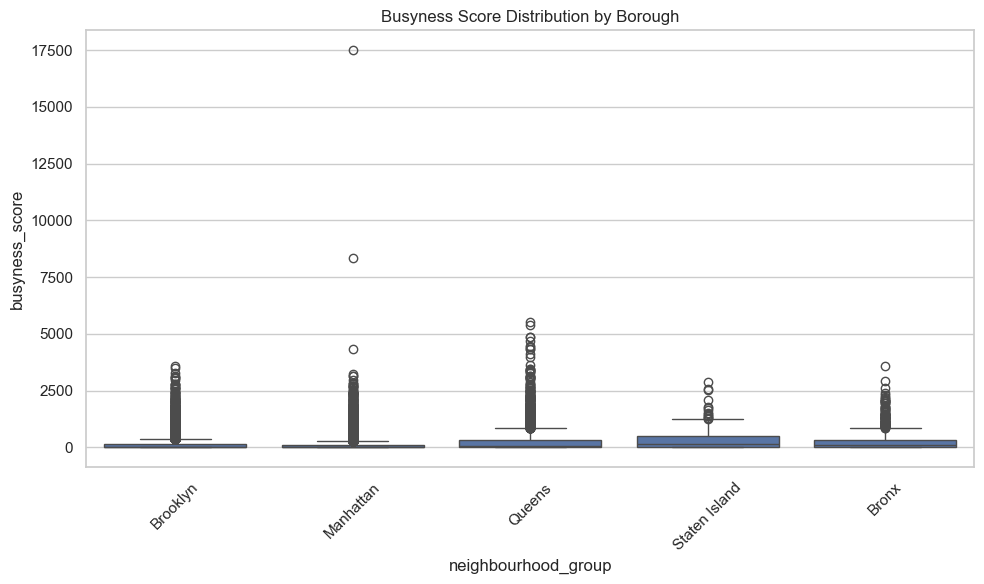

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.title("Price Distribution by Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='busyness_score')
plt.title("Busyness Score Distribution by Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()